In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.patheffects as PathEffects


In [49]:
fig_width_pt = 150  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/1.5
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [6]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", plt.cm.Dark2.colors)

In [45]:
list_L=np.array([25,50,100,200,400,800])

scp -r chihiro:~/Thesis/AI2D/AI2D_on_lattice/spontaneous_destab_liqphase/1box/destab_D0.1_L/* destab_D0.1_L_chihiro

In [46]:
td={}
for L in list_L:
    td[L]=np.array([])
#     for i in range(10):
#         try:
#             data=np.loadtxt("destab_D0.1_L/L%d/i%d/f_mag.dat"%(L,i), usecols=(0))[-1]
#             td[L].append(data)
#         except:
#             pass
    for i in range(10):
        try:
            data=np.loadtxt("destab_D0.1_L2/L%d/i%d/f_mag.dat"%(L,i), usecols=(0))
            td[L]=np.concatenate((td[L], data))
        except:
            pass

    for i in range(51):
        try:
            data=np.loadtxt("destab_D0.1_L_chihiro/L%d/i%d/f_mag.dat"%(L,i), usecols=(0))
            td[L]=np.concatenate((td[L], data))
        except:
            pass

In [56]:
td[400].shape

(603,)

In [84]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/1.1
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

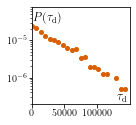

In [116]:

plt.plot([],[])
h,b=np.histogram(td[200], bins=np.linspace(0,150000,23), density=True)
plt.semilogy(b[:-1], h, 'o', markersize=4, linewidth=0.8)

plt.xlim(0.,150000-1)
plt.ylim(1.9e-7, 8e-5)

x=plt.xlabel(r'$\tau_{\rm d}$', labelpad=-25, x=0.92)
x.set_in_layout(False)

plt.ylabel(r'$P(\tau_{\rm d})$', labelpad=-40, y=0.82, rotation=0)

plt.tight_layout(pad=0.01)

plt.savefig('P_tau_d_order.pdf');

In [117]:
a, b = np.polyfit(np.log(list(td)),
             np.log([np.mean(td[tau]) for tau in td]), deg=1)

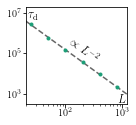

In [126]:
xlab=0.45
ylab=1.06

######### tau_d L #########
plt.subplot(111)
#plt.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

plt.errorbar(list(td),
             [np.mean(td[tau]) for tau in td],
             yerr=0*np.array([np.std(td[tau]) for tau in td])/np.sqrt([len(td[tau]) for tau in td]),
             capsize=0,
             markersize=ms,
             fmt='o')

ax_L=np.linspace(20,1200)
plt.loglog(ax_L, np.exp(b)*ax_L**(a), 'k--', alpha=0.6)
ax=plt.gca()
ax.loglog()
plt.yticks([1e3, 1e5, 1e7])
plt.xlim([20,1200])
plt.ylim(0.3e3, 2e7)

plt.xlabel(r'$L$', labelpad=-24, x=0.95, rotation=0, zorder=100);
plt.ylabel(r'$\tau_{\rm d}$', labelpad=-26, y=0.85, rotation=0, zorder=100);

plt.text(x=110, y=0.4e5, s=r'$\propto L^{-2}$', rotation=-35)

plt.tight_layout(pad=0.01)

plt.savefig('tau_d_L2.pdf', dpi=400);

# Scaling of the destabilization time w/ $l_y$

In [30]:
fig_width_pt = 246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [16]:
list_ly=np.arange(1,20,1)

scp -r chihiro:~/Thesis/AI2D/AI2D_on_lattice/spontaneous_destab_liqphase/1box/destab_D0.1_ly/* destab_D0.1_ly_chihiro

In [17]:
td_1={}
for ly in list_ly:
    td_1[ly]=np.array([])
#     for i in range(21):
#         try:
#             data=np.loadtxt("destab_D0.1_ly/ly%d/i%d/f_mag.dat"%(ly,i), usecols=(0))[-1]
#             td_1[ly].append(data)
#         except:
#             pass

    for i in range(50):
        try:
            data=np.loadtxt("destab_D0.1_ly_chihiro/ly%d/i%d/f_mag.dat"%(ly,i), usecols=(0))
            td_1[ly]=np.concatenate((td_1[ly], data))
        except:
            pass
        
    print(ly, len(td_1[ly]))

1 500
2 500
3 500
4 500
5 500
6 500
7 500
8 500
9 500
10 500
11 500
12 500
13 500
14 500
15 495
16 490
17 485
18 481
19 457


In [18]:
td_12={}
for ly in list_ly:
    td_12[ly]=np.array([])

    for i in range(50):
        try:
            data=np.loadtxt("destab_D0.12_L2/ly%d/i%d/f_mag.dat"%(ly,i), usecols=(0))
            td_12[ly]=np.concatenate((td_12[ly], data))
        except:
            pass
    
    for i in range(50):
        try:
            data=np.loadtxt("destab_D0.12_ly_chihiro/ly%d/i%d/f_mag.dat"%(ly,i), usecols=(0))
            td_12[ly]=np.concatenate((td_12[ly], data))
        except:
            pass
        
    print(ly, len(td_12[ly]))

1 1000
2 589
3 109


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly3/i2/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly3/i5/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly3/i6/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly3/i7/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly4/i0/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty inpu

4 97
5 111
6 100


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly5/i5/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly6/i6/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly7/i2/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly7/i8/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly7/i9/f_mag.dat"
  import sys


7 104
8 111
9 162


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly8/i5/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly8/i8/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: loadtxt: Empty input file: "destab_D0.12_ly_chihiro/ly8/i8/f_mag.dat"
  


10 44
11 73
12 132


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly11/i0/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly11/i1/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly11/i2/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly11/i5/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly11/i6/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty

13 63
14 35


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly14/i1/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly14/i2/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly14/i3/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly14/i4/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "destab_D0.12_L2/ly14/i5/f_mag.dat"
  import sys
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty

15 25
16 40


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: loadtxt: Empty input file: "destab_D0.12_ly_chihiro/ly17/i4/f_mag.dat"
  


17 32
18 42
19 37


In [19]:
td_11={}
for ly in list_ly:
    td_11[ly]=np.array([])
#     for i in range(21):
#         try:
#             data=np.loadtxt("destab_D0.1_ly/ly%d/i%d/f_mag.dat"%(ly,i), usecols=(0))[-1]
#             td_11[ly].append(data)
#         except:
#             pass

    for i in range(50):
        try:
            data=np.loadtxt("destab_D0.11_ly_chihiro/ly%d/i%d/f_mag.dat"%(ly,i), usecols=(0))
            td_11[ly]=np.concatenate((td_11[ly], data))
        except:
            pass
        
    for i in range(50):
        try:
            data=np.loadtxt("destab_D0.11_ly/ly%d/i%d/f_mag.dat"%(ly,i), usecols=(0))
            td_11[ly]=np.concatenate((td_11[ly], data))
        except:
            pass
        
    print(ly, len(td_11[ly]))

1 6100
2 671
3 498


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly3/i0/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly3/i1/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly3/i4/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly3/i5/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly3/i6/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/s

4 447
5 351


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly5/i1/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly5/i4/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly5/i5/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly5/i7/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly5/i10/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/

6 432
7 386


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly7/i1/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly7/i2/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly7/i5/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly7/i10/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly8/i1/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/

8 344
9 438


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly9/i0/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly9/i1/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly9/i5/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly9/i6/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly9/i7/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/s

10 359
11 317


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly11/i0/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly11/i3/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly11/i4/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly11/i5/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly11/i6/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python

12 497
13 446


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly13/i1/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly13/i3/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly13/i4/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly13/i5/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly13/i6/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python

14 279
15 5


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly15/i0/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly15/i2/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly15/i3/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly15/i5/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly15/i6/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python

16 2
17 8
18 4


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly17/i1/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly17/i2/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly17/i4/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly17/i6/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly17/i7/f_mag.dat"
  del sys.path[0]
/users/invites/benvegnen/anaconda3/lib/python

19 4


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: loadtxt: Empty input file: "destab_D0.11_ly_chihiro/ly19/i8/f_mag.dat"
  del sys.path[0]


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


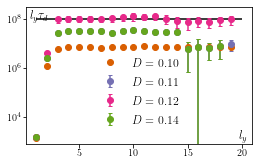

In [43]:
plt.plot([], [])
# plt.errorbar(list(td_1),
#              [np.mean(td_1[tau]) for tau in td_1],
#              yerr=3*np.array([np.std(td_1[tau]) for tau in td_1])/np.sqrt([len(td_1[tau]) for tau in td_1]),
#              capsize=0,
#              fmt='o',
#             label=r'$D=0.10$')

plt.plot(np.array(list(td_1)),
             np.array(list(td_1))*np.array([np.mean(td_1[tau]) for tau in td_1]),
             'o',
            label=r'$D=0.10$')

plt.errorbar(np.array(list(td_11)),
             np.array(list(td_11))*np.array([np.mean(td_11[tau]) for tau in td_11]),
             yerr=3*np.array(list(td_11))*np.array([np.std(td_11[tau]) for tau in td_11])/np.sqrt([len(td_11[tau]) for tau in td_11]),
             capsize=2,
             fmt='o',
            label=r'$D=0.11$')

plt.errorbar(np.array(list(td_12)),
             np.array(list(td_12))*np.array([np.mean(td_12[tau]) for tau in td_12]),
             yerr=3*np.array(list(td_12))*np.array([np.std(td_12[tau]) for tau in td_12])/np.sqrt([len(td_12[tau]) for tau in td_12]),
             capsize=2,
             fmt='o',
            label=r'$D=0.12$')

plt.errorbar(np.array(list(td_14)),
             np.array(list(td_14))*np.array([np.mean(td_14[tau]) for tau in td_14]),
             yerr=3*np.array(list(td_14))*np.array([np.std(td_14[tau]) for tau in td_14])/np.sqrt([len(td_14[tau]) for tau in td_12]),
             capsize=2,
             fmt='o',
            label=r'$D=0.14$')

plt.hlines(1e8, 1,20)


plt.semilogy()
plt.legend(loc=(0.3,0.1))

plt.xlabel(r'$l_y$', labelpad=-26, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$l_y\tau_d$', labelpad=-32, y=0.88, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)
#plt.savefig('tau_d_ly.pdf');

# Spontaneous destab snapshot

In [40]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [41]:
L=10000

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def outputSnap(df,kt):
    t0=np.unique(df.t)[kt]
    v0=10
    X_m=df[df.t==t0].drop(columns=['t'])
    np.savetxt('snap_kt%d.dat'%kt, X_m)
    return()

df=pd.read_parquet('f_profiles_m.parquet')


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [57]:
outputSnap(df_m,0)

()

In [61]:
t0=np.unique(df_m.t)

In [63]:
t0.shape

(6755,)

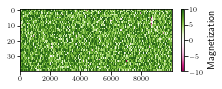

In [64]:
kt=1490
t0=np.unique(df_m.t)[kt]
v0=10
X_m=df_m[df_m.t==t0].drop(columns=['t'])
img=plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0, aspect="auto")

#plt.xlim(1000,2000)
cbar = plt.colorbar(img)
cbar.set_label('Magnetization')

In [55]:
np.savetxt('snap_kt%d.dat'%kt, X_m)

In [43]:
fig_width_pt = 246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/3
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [44]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


top = cm.get_cmap('PuBu_r', 128)
bottom = cm.get_cmap('YlOrBr', 128)
middle = (1,1,1,1)
newcolors = np.vstack((top(np.linspace(0, 1, 20)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [49]:
df_m[df_m.t==0]

,t,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,7.0,8.0,12.0,7.0,6.0,10.0,8.0,6.0,7.0,...,8.0,12.0,4.0,8.0,5.0,10.0,9.0,10.0,11.0,6.0
1,0.0,5.0,11.0,8.0,5.0,6.0,9.0,5.0,8.0,7.0,...,11.0,7.0,12.0,11.0,11.0,9.0,9.0,10.0,5.0,9.0
2,0.0,5.0,7.0,7.0,6.0,8.0,6.0,7.0,7.0,8.0,...,10.0,8.0,4.0,8.0,5.0,6.0,9.0,9.0,6.0,6.0
3,0.0,2.0,5.0,8.0,12.0,3.0,4.0,5.0,7.0,8.0,...,5.0,8.0,10.0,13.0,12.0,9.0,5.0,6.0,9.0,5.0
4,0.0,10.0,15.0,15.0,7.0,9.0,5.0,3.0,4.0,8.0,...,9.0,13.0,16.0,6.0,5.0,8.0,9.0,9.0,7.0,7.0
5,0.0,13.0,4.0,2.0,7.0,6.0,8.0,4.0,4.0,3.0,...,5.0,10.0,5.0,9.0,6.0,4.0,9.0,4.0,10.0,10.0
6,0.0,6.0,8.0,6.0,6.0,11.0,10.0,10.0,8.0,5.0,...,13.0,7.0,9.0,8.0,9.0,12.0,12.0,7.0,10.0,7.0
7,0.0,5.0,7.0,6.0,13.0,4.0,3.0,8.0,9.0,5.0,...,10.0,9.0,9.0,6.0,9.0,8.0,4.0,9.0,4.0,11.0
8,0.0,5.0,4.0,10.0,14.0,13.0,10.0,11.0,12.0,12.0,...,8.0,12.0,5.0,5.0,12.0,3.0,6.0,8.0,12.0,7.0
9,0.0,7.0,12.0,13.0,8.0,14.0,5.0,12.0,6.0,8.0,...,6.0,12.0,9.0,12.0,8.0,9.0,7.0,11.0,10.0,10.0


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


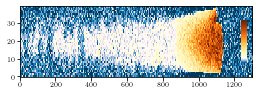

In [45]:

kt=1570
t0=np.unique(df_m.t)[kt]
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=10)[:,7400:8700]

pcm=plt.imshow(X_m[:,::-1], cmap=newcmp, aspect='auto', vmin=-9, vmax=60, origin='lower')

inset_ax = inset_axes(plt.gca(),
                          height="61%", # set height
                          width="2.54%", # and width
                          loc=7,
                          #bbox_to_anchor=(75,130, 100, 100)
                     )

cbar=plt.colorbar(pcm, fraction=0.1, ticks=[-5, 0, +5], cax = inset_ax, 
                  orientation='vertical',
                    drawedges=False)

cbar.outline.set_visible(False)
cbar.ax.tick_params(size=1, color='w')
cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')

cbar.ax.set_ylabel(r'$m$', rotation=0, labelpad=-14, y=1.3, color="w")
plt.tight_layout(pad=0.01)

plt.savefig('spontaneous_micro.pdf', dpi=400);


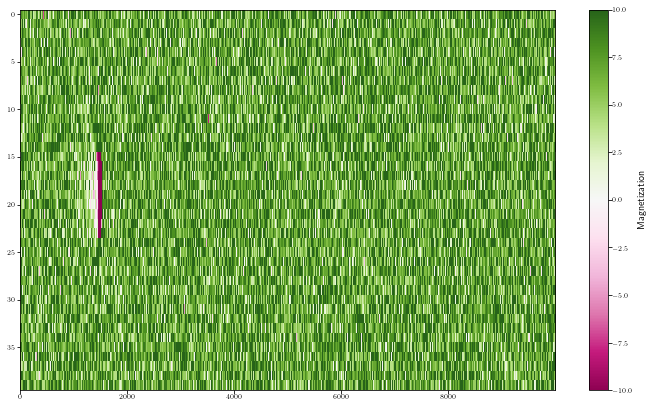

In [47]:
fig, ax = plt.subplots(figsize=(12, 7))

kt=1500
t0=np.unique(df_m.t)[kt]
v0=10
X_m=np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=10)[:,::-1]
img=plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0, aspect="auto")

#plt.xlim(1000,2000)
cbar = plt.colorbar(img)
cbar.set_label('Magnetization')
#np.min(X_m[X_m<0])

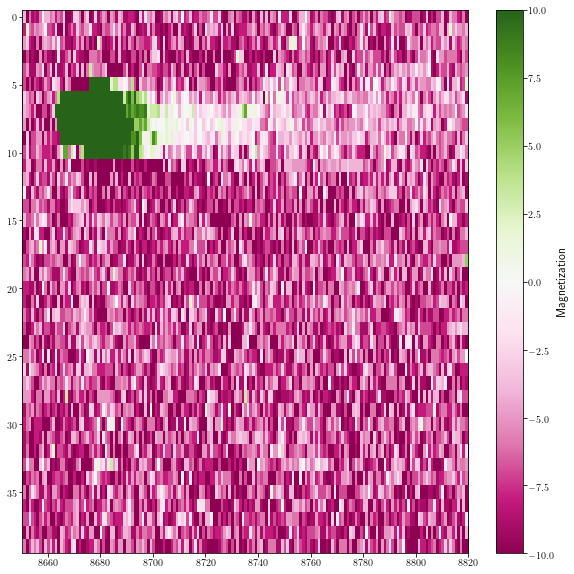

In [315]:
fig, ax = plt.subplots(figsize=(10, 10))

kt=1485
t0=np.unique(df_m.t)[kt]
v0=10
X_m=-(df_m[df_m.t==t0].drop(columns=['t']))
img=plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0, aspect="auto")

plt.xlim(8650,8820)
cbar = plt.colorbar(img)
cbar.set_label('Magnetization')
#np.min(X_m[X_m<0])

# Panel1 Fig. 4

In [38]:
fig_width_pt = 246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/4.5
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [39]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


top = cm.get_cmap('PuBu_r', 128)
bottom = cm.get_cmap('YlOrBr', 128)
middle = (1,1,1,1)
newcolors = np.vstack((top(np.linspace(0, 1, 20)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

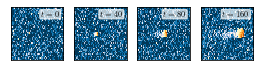

In [600]:
x0=1270
dx=200
vmin=-1
vmax=7
sh=11
rho0=8

xtime=1440
ytime=34

ti=np.int64(np.unique(df_m.t)[1474])

plt.subplot(141)
ax=plt.gca()
kt=1474
t0=np.unique(df_m.t)[kt]
# txt=plt.text(x=xtime, y=ytime, s=r'$t=%d$'%(t0-ti), fontsize=8, color="w", horizontalalignment='right')
# txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='k')])

t=plt.text(xtime, ytime, r'$t=%d$'%(t0-ti), fontsize=8, rotation=0.,
         ha="right", va="center",
         bbox=dict(boxstyle="round,pad=0.15",
                   ec='w',
                   fc='w',
                   alpha=0.7
                   )
         )
v0=10
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=sh)[:,::-1]/rho0
img=plt.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
plt.xlim(x0-dx,x0+dx)
plt.xticks([])
plt.yticks([])

# inset_ax = inset_axes(ax,
#                           height="100%", # set height
#                           width="100%", # and width
#                           loc=1,
#                           bbox_to_anchor=(15, 15, 4, 30)
#                      )

# cbar=plt.colorbar(img, fraction=0.1, ticks=[-1, 0, +4], cax = inset_ax, 
#                   orientation='vertical',
#                     drawedges=False)

# cbar.outline.set_visible(False)
# cbar.ax.tick_params(size=1, color='w')
# cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
# plt.setp(cbar_yticks, color='w')

# cbar.ax.set_ylabel(r'${m}/{\rho_0}$', rotation=0, labelpad=-14, y=1.2, color="w", fontsize=6)




plt.subplot(142)
kt=1478
t0=np.unique(df_m.t)[kt]

t=plt.text(xtime, ytime, r'$t=%d$'%(t0-ti), fontsize=8, rotation=0.,
         ha="right", va="center",
         bbox=dict(boxstyle="round,pad=0.15",
                   ec='w',
                   fc='w',
                   alpha=0.7
                   )
         )
v0=10
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=sh)[:,::-1]/rho0
img=plt.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
plt.xlim(x0-dx,x0+dx)
plt.yticks([])
plt.xticks([])


plt.subplot(143)
kt=1482
t0=np.unique(df_m.t)[kt]

t=plt.text(xtime, ytime, r'$t=%d$'%(t0-ti), fontsize=8, rotation=0.,
         ha="right", va="center",
         bbox=dict(boxstyle="round,pad=0.15",
                   ec='w',
                   fc='w',
                   alpha=0.7
                   )
         )
v0=10
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=sh)[:,::-1]/rho0
img=plt.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
plt.xlim(x0-dx,x0+dx)
plt.yticks([])
plt.xticks([])

plt.subplot(144)
kt=1490
t0=np.unique(df_m.t)[kt]

t=plt.text(xtime, ytime, r'$t=%d$'%(t0-ti), fontsize=8, rotation=0.,
         ha="right", va="center",
         bbox=dict(boxstyle="round,pad=0.15",
                   ec='w',
                   fc='w',
                   alpha=0.7
                   )
         )
v0=10
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=sh)[:,::-1]/rho0

img=plt.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
plt.xlim(x0-dx,x0+dx)
plt.yticks([])
plt.xticks([])



plt.subplots_adjust(hspace=0.3, wspace=0.2, left=0.005, right=0.995, top=0.99, bottom=0.01)

plt.savefig('panel1_fig4_v1.pdf', dpi=400);

In [37]:
plt.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')

NameError: name 'X_m' is not defined

# Panel2 Fig. 4

In [601]:
fig_width_pt = 246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/2.3
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [604]:
from scipy.optimize import fixed_point

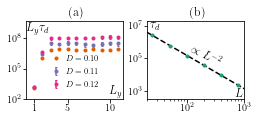

In [607]:
xlab=0.45
ylab=1.06
######### tau_d l_y #########

plt.subplot(121)
plt.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

ms=3

cs=1
plt.plot([], [])

plt.plot(np.array(list(td_1)),
             np.array(list(td_1))*np.array([np.mean(td_1[tau]) for tau in td_1]),
             'o',
         markersize=ms,
            label=r'$D=0.10$')

plt.errorbar(np.array(list(td_11)),
             np.array(list(td_11))*np.array([np.mean(td_11[tau]) for tau in td_11]),
             yerr=3*np.array(list(td_11))*np.array([np.std(td_11[tau]) for tau in td_11])/np.sqrt([len(td_11[tau]) for tau in td_11]),
             capsize=cs,
             fmt='o',
              markersize=ms,
            label=r'$D=0.11$')

plt.errorbar(np.array(list(td_12)),
             np.array(list(td_12))*np.array([np.mean(td_12[tau]) for tau in td_12]),
             yerr=3*np.array(list(td_12))*np.array([np.std(td_12[tau]) for tau in td_12])/np.sqrt([len(td_12[tau]) for tau in td_12]),
             capsize=cs,
             fmt='o',
         markersize=ms,
            label=r'$D=0.12$')




plt.semilogy()
plt.legend(loc=(0.2,0.1), fontsize=8, handletextpad=0.2)

plt.ylim(1e2, 5e9)
plt.xlim(0,11.5)
plt.xticks([1,5,10])
plt.xlabel(r'$L_y$', labelpad=-26, x=0.92, rotation=0, zorder=100);
plt.ylabel(r'$L_y\tau_d$', labelpad=-30, y=0.81, rotation=0, zorder=100);


######### tau_d L #########
plt.subplot(122)
plt.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

plt.errorbar(list(td),
             [np.mean(td[tau]) for tau in td],
             yerr=0*np.array([np.std(td[tau]) for tau in td])/np.sqrt([len(td[tau]) for tau in td]),
             capsize=0,
             markersize=ms,
             fmt='o')

ax_L=np.linspace(20,1200)
plt.loglog(ax_L, np.exp(b)*ax_L**(a), 'k--')
ax=plt.gca()
ax.loglog()
plt.yticks([1e3, 1e5, 1e7])
plt.xlim([20,1000])
plt.ylim(0.3e3, 2e7)

plt.xlabel(r'$L$', labelpad=-24, x=0.95, rotation=0, zorder=100);
plt.ylabel(r'$\tau_d$', labelpad=-26, y=0.85, rotation=0, zorder=100);

plt.text(x=110, y=0.4e5, s=r'$\propto L^{-2}$', rotation=-25)

plt.subplots_adjust(hspace=0.3, wspace=0.25, left=0.08, right=0.97, top=0.86, bottom=0.12)

plt.savefig('panel2_fig4_v1.pdf', dpi=400);

# Panel2a Fig. 4

In [13]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/1.1
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [14]:
from scipy.optimize import fixed_point

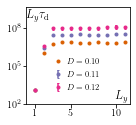

In [124]:
xlab=0.45
ylab=1.06
######### tau_d l_y #########

plt.subplot(111)
#plt.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

ms=3

cs=1
plt.plot([], [])

plt.plot(np.array(list(td_1)),
             np.array(list(td_1))*np.array([np.mean(td_1[tau]) for tau in td_1]),
             'o',
         markersize=ms,
            label=r'$D=0.10$')

plt.errorbar(np.array(list(td_11)),
             np.array(list(td_11))*np.array([np.mean(td_11[tau]) for tau in td_11]),
             yerr=3*np.array(list(td_11))*np.array([np.std(td_11[tau]) for tau in td_11])/np.sqrt([len(td_11[tau]) for tau in td_11]),
             capsize=cs,
             fmt='o',
              markersize=ms,
            label=r'$D=0.11$')

plt.errorbar(np.array(list(td_12)),
             np.array(list(td_12))*np.array([np.mean(td_12[tau]) for tau in td_12]),
             yerr=3*np.array(list(td_12))*np.array([np.std(td_12[tau]) for tau in td_12])/np.sqrt([len(td_12[tau]) for tau in td_12]),
             capsize=cs,
             fmt='o',
         markersize=ms,
            label=r'$D=0.12$')




plt.semilogy()
plt.legend(loc=(0.2,0.1), fontsize=8, handletextpad=0.2)

plt.ylim(1e2, 5e9)
plt.xlim(0,11.5)
plt.xticks([1,5,10])
plt.xlabel(r'$L_y$', labelpad=-26, x=0.92, rotation=0, zorder=100);
plt.ylabel(r'$L_y\tau_{\rm d}$', labelpad=-30, y=0.84, rotation=0, zorder=100);

plt.tight_layout(pad=0.01)

plt.savefig('tau_ly.pdf', dpi=400);

In [23]:
data=np.zeros((11,4))

In [20]:
data[:,0]=np.array(list(td_12))[:11]

In [21]:
data[:,1]=(np.array(list(td_1))*np.array([np.mean(td_1[tau]) for tau in td_1]))[:11]

In [22]:
data[:,2]=(np.array(list(td_11))*np.array([np.mean(td_11[tau]) for tau in td_11]))[:11]

In [23]:
data[:,3]=(np.array(list(td_12))*np.array([np.mean(td_12[tau]) for tau in td_12]))[:11]

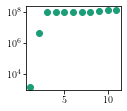

In [25]:
plt.semilogy(data[:,0], data[:,3], 'o')

In [30]:
np.savetxt('data_fig4_panel2a.dat', data_tau_D, header='L_y D0.10 D0.11 D0.12')

In [3]:
data_tau_D=np.loadtxt("data_fig4_panel2a.dat")

In [31]:
data_tau_D

array([[1.00000000e+00, 1.36501507e+03, 1.47985080e+03, 1.49225542e+03],
       [2.00000000e+00, 1.21270838e+06, 2.60223576e+06, 4.31750265e+06],
       [3.00000000e+00, 6.14456068e+06, 2.79918866e+07, 9.80469663e+07],
       [4.00000000e+00, 7.59562321e+06, 3.19614399e+07, 1.04381086e+08],
       [5.00000000e+00, 7.55216802e+06, 3.15703883e+07, 1.02197463e+08],
       [6.00000000e+00, 7.28853739e+06, 3.21929702e+07, 1.02590307e+08],
       [7.00000000e+00, 6.77752505e+06, 3.14436889e+07, 1.02217853e+08],
       [8.00000000e+00, 7.57991809e+06, 2.84116992e+07, 1.06969503e+08],
       [9.00000000e+00, 7.36885512e+06, 3.19934318e+07, 1.18477826e+08],
       [1.00000000e+01, 7.24873516e+06, 3.43707349e+07, 1.31285865e+08],
       [1.10000000e+01, 7.80379898e+06, 3.33447478e+07, 1.25257928e+08]])

In [7]:
data_tau_D[-1, 1:]

array([7.80379898e+06, 3.33447478e+07, 1.25257928e+08])

Text(0, 0.5, '$\\tau_{\\rm d}$')

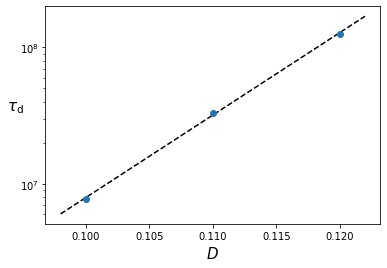

In [25]:
plt.semilogy([0.1, 0.11, 0.12], data_tau_D[-1, 1:], 'o')
a,b = np.polyfit([0.1, 0.11, 0.12], np.log(data_tau_D[-1, 1:]), 1)

vec_D=np.linspace(0.098, 0.122)
plt.plot(vec_D, np.exp(a*vec_D+b), 'k--', zorder=0)

plt.xlabel(r"$D$", fontsize=15)
plt.ylabel(r"$\tau_{\rm d}$", fontsize=15, rotation=0)

In [26]:
data=np.zeros((3,2))
data[:,0]=[0.1, 0.11, 0.12]
data[:,1]=data_tau_D[-1, 1:]

In [29]:
np.savetxt('data_taud_D.dat', data, header='D tau_d')

# Panel2b Fig. 4

In [24]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/1.1
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

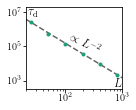

In [119]:
xlab=0.45
ylab=1.06

######### tau_d L #########
plt.subplot(111)
#plt.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

plt.errorbar(list(td),
             [np.mean(td[tau]) for tau in td],
             yerr=0*np.array([np.std(td[tau]) for tau in td])/np.sqrt([len(td[tau]) for tau in td]),
             capsize=0,
             markersize=ms,
             fmt='o')

ax_L=np.linspace(20,1200)
plt.loglog(ax_L, np.exp(b)*ax_L**(a), 'k--', alpha=0.6)
ax=plt.gca()
ax.loglog()
plt.yticks([1e3, 1e5, 1e7])
plt.xlim([20,1000])
plt.ylim(0.3e3, 2e7)

plt.xlabel(r'$L$', labelpad=-24, x=0.95, rotation=0, zorder=100);
plt.ylabel(r'$\tau_{\rm d}$', labelpad=-26, y=0.85, rotation=0, zorder=100);

plt.text(x=110, y=0.4e5, s=r'$\propto L^{-2}$', rotation=-25)

plt.subplots_adjust(hspace=0.3, wspace=0.25, left=0.15, right=0.94, top=0.86, bottom=0.12)

plt.savefig('tau_d_L2.pdf', dpi=400);

In [32]:
data=np.zeros((len(list(td)),2))

In [33]:
data[:,0]=list(td)

In [34]:
data[:,1]=[np.mean(td[tau]) for tau in td]

In [44]:
plt.loglog(data[:,0], data[:,1], 'o')

IndexError: too many indices for array

In [36]:
np.savetxt('data_fig4_panel2b.dat', data, header='L tau_d')

# Other attempts

In [359]:
from matplotlib.gridspec import GridSpec

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


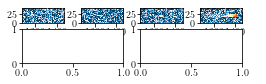

In [389]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(3, 4, figure=fig)
x0=1270
dx=200
vmin=-10
vmax=50
sh=11


ax0 = fig.add_subplot(gs[0,0])

kt=1474

t0=np.unique(df_m.t)[kt]
ax0.text(x=xtime, y=ytime, s=r'$t=%d$'%t0, fontsize=8, color="w")

v0=10
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=sh)[:,::-1]
img=ax0.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
ax0.set_xlim(x0-dx,x0+dx)


ax1 = fig.add_subplot(gs[0,1])

kt=1478

t0=np.unique(df_m.t)[kt]
ax2.text(x=xtime, y=ytime, s=r'$t=%d$'%t0, fontsize=8, color="w")

v0=10
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=sh)[:,::-1]
img=ax1.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
ax1.set_xlim(x0-dx,x0+dx)


ax2 = fig.add_subplot(gs[0,2])

kt=1482
t0=np.unique(df_m.t)[kt]
ax2.text(x=xtime, y=ytime, s=r'$t=%d$'%t0, fontsize=8, color="w")

v0=10
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=sh)[:,::-1]
img=ax2.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
ax2.set_xlim(x0-dx,x0+dx)

ax3 = fig.add_subplot(gs[0,3])

kt=1492
t0=np.unique(df_m.t)[kt]
ax3.text(x=xtime, y=ytime, s=r'$t=%d$'%t0, fontsize=8, color="w")

v0=10
X_m=-np.roll(df_m[df_m.t==t0].drop(columns=['t']), axis=0, shift=sh)[:,::-1]
img=ax3.imshow(X_m, cmap=newcmp, aspect='auto', vmin=vmin, vmax=vmax, origin='lower')
ax3.set_xlim(x0-dx,x0+dx)

ax4 = fig.add_subplot(gs[1:,0:2 ])
ax5 = fig.add_subplot(gs[1:,2: ])


plt.subplots_adjust(hspace=0.4, wspace=0.4, left=0.07, right=0.97, top=0.99, bottom=0.09)
